# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2020

## Project 1 - The Trapped Knight
Due Wednesday, February 19

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.

- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [1]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers
function initialize_board(n)
    board = zeros(Int64, (2n+1), (2n+1))
    #return board
    set_of_moves = 1
    highest_number = (2n+1)^2
    current_number = 1
    current_position_row = n+1
    current_position_column = n+1
    board[current_position_row, current_position_column] = 1
    while current_number < highest_number
        # this moves to the right
        # tests for last set of moves
        if set_of_moves == 2n+1 
            for rights in 1:(set_of_moves-1)
                current_number += 1
                current_position_column += 1
                board[current_position_row, current_position_column] = current_number
            end
            # breaks the while loop as highest_number would have been reached and this is the last set of moves
            break
        else
            for rights in 1:set_of_moves
                current_number += 1
                current_position_column += 1
                board[current_position_row, current_position_column] = current_number
            end
        end
        # this moves up
        for ups in 1:set_of_moves
            current_number += 1
            current_position_row -= 1
            board[current_position_row, current_position_column] = current_number
        end
        set_of_moves += 1
        # this moves left
        for lefts in 1:set_of_moves
            current_number += 1
            current_position_column -= 1
            board[current_position_row, current_position_column] = current_number
        end
        # this moves down
        for downs in 1:set_of_moves
            current_number += 1
            current_position_row += 1
            board[current_position_row, current_position_column] = current_number
        end
        set_of_moves += 1
    end
    return board
end

initialize_board (generic function with 1 method)

In [2]:
initialize_board(2)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

In [3]:
initialize_board(5)

11×11 Array{Int64,2}:
 101  100   99   98   97   96   95   94   93   92   91
 102   65   64   63   62   61   60   59   58   57   90
 103   66   37   36   35   34   33   32   31   56   89
 104   67   38   17   16   15   14   13   30   55   88
 105   68   39   18    5    4    3   12   29   54   87
 106   69   40   19    6    1    2   11   28   53   86
 107   70   41   20    7    8    9   10   27   52   85
 108   71   42   21   22   23   24   25   26   51   84
 109   72   43   44   45   46   47   48   49   50   83
 110   73   74   75   76   77   78   79   80   81   82
 111  112  113  114  115  116  117  118  119  120  121

In [4]:
initialize_board(20)

41×41 Array{Int64,2}:
 1601  1600  1599  1598  1597  1596  …  1566  1565  1564  1563  1562  1561
 1602  1445  1444  1443  1442  1441     1411  1410  1409  1408  1407  1560
 1603  1446  1297  1296  1295  1294     1264  1263  1262  1261  1406  1559
 1604  1447  1298  1157  1156  1155     1125  1124  1123  1260  1405  1558
 1605  1448  1299  1158  1025  1024      994   993  1122  1259  1404  1557
 1606  1449  1300  1159  1026   901  …   871   992  1121  1258  1403  1556
 1607  1450  1301  1160  1027   902      870   991  1120  1257  1402  1555
 1608  1451  1302  1161  1028   903      869   990  1119  1256  1401  1554
 1609  1452  1303  1162  1029   904      868   989  1118  1255  1400  1553
 1610  1453  1304  1163  1030   905      867   988  1117  1254  1399  1552
 1611  1454  1305  1164  1031   906  …   866   987  1116  1253  1398  1551
 1612  1455  1306  1165  1032   907      865   986  1115  1252  1397  1550
 1613  1456  1307  1166  1033   908      864   985  1114  1251  1396  1549
   

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [5]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk
function simulate_walk(board)
    # creating board to keep track of visits
    visits = zeros(Int64, size(board))
    
    # variables to keep track of position
    n = convert(Int64, (sqrt(length(board)) - 1)/2)
    x_coordinates = [0]
    y_coordinates = [0]
    sequence = [1]
    current_position_row = n+1
    current_position_column = n+1
    # putting knight down in center
    visits[n+1, n+1] = 1
    possible_moves = zeros(8)
    # function for checking whether a position has been visited
    function has_been_visited(position_row, position_column)
        if visits[position_row, position_column] == 0
            return false
        else
            return true
        end
    end
    
    # function for finding most optimal possible move and executing that move
    function optimal_possible(row, column)
        row_moves = [-2, -1, 1, 2, 2, 1, -1, -2]
        column_moves = [1, 2, 2, 1, -1, -2, -2, -1]
        for i in 1:8
            new_row = row + row_moves[i]
            new_column = column + column_moves[i]
            if (((0 < new_row <= (2n+1)) && (0 < new_column <= (2n+1))) && (has_been_visited(new_row, new_column) == false))
                possible_moves[i] = board[new_row, new_column]
            else
                possible_moves[i] = Inf
            end
        end
        if all(z -> z == Inf, possible_moves) == true
            knight_is_trapped = true
        else
            optimal_index = argmin(possible_moves)
            current_position_row = row + row_moves[optimal_index]
            current_position_column = column + column_moves[optimal_index]
            push!(sequence, possible_moves[optimal_index])
            push!(x_coordinates, x_coordinates[end] + column_moves[optimal_index])
            push!(y_coordinates, y_coordinates[end] - row_moves[optimal_index])
            visits[current_position_row, current_position_column] = 1
        end
    end
    
    # setting knight to begin free
    knight_is_trapped = false
    
    # path of knight until trapped
    while knight_is_trapped == false
        optimal_possible(current_position_row, current_position_column)
        if knight_is_trapped == true
            break
        end
    end
    return sequence, x_coordinates, y_coordinates
end

simulate_walk (generic function with 1 method)

In [6]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, -1, 1, 0, -1, 1, -1, 0, 1, -1, 0, 2]


### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

last number = 2084

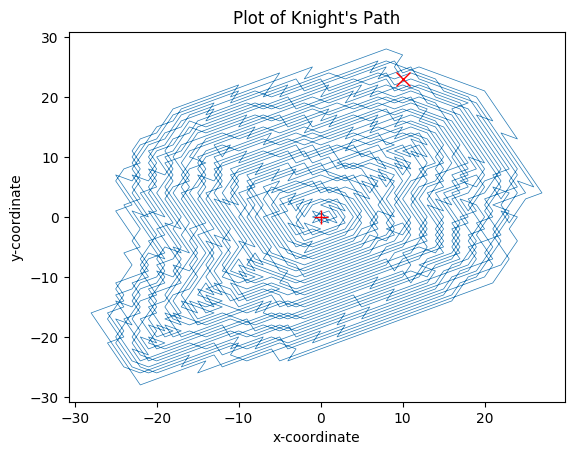

In [7]:
board = initialize_board(100)
seq, xs, ys = simulate_walk(board);
println("last number = ", seq[end])
using PyPlot
plot(xs, ys, linewidth = 0.5)
plot(xs[end], ys[end], marker = "x", ms = 10, color = "r")
plot(xs[1], ys[1], marker = "+", ms = 10, color = "r")
xlabel("x-coordinate")
ylabel("y-coordinate")
title("Plot of Knight's Path");